<a href="https://colab.research.google.com/github/mansi812/ML-assignment/blob/main/ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#The following code snippet is used to upload a file from the local drive to Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Coupon Reco.xlsx to Coupon Reco (1).xlsx
User uploaded file "Coupon Reco.xlsx" with length 1207913 bytes


In [20]:
fname = "Coupon Reco.xlsx"
df = pd.read_excel(fname)


In [ ]:
#Check the first 5 records
df.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
df.shape

(12684, 25)

In [28]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df.isnull().sum()

destination               0
passenger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [ ]:
#Distribution of target variable in dataset
df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [ ]:
df.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: Not accepted|| 1: accepted)')

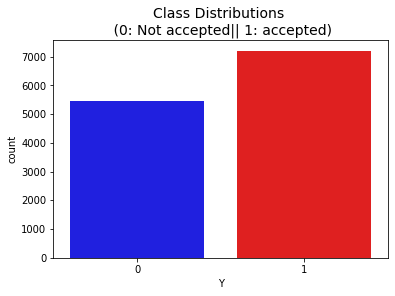

In [ ]:
colors = ["blue", "red"]

sns.countplot('Y', data=df, palette=colors)
plt.title('Class Distributions \n (0: Not accepted|| 1: accepted)', fontsize=14)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

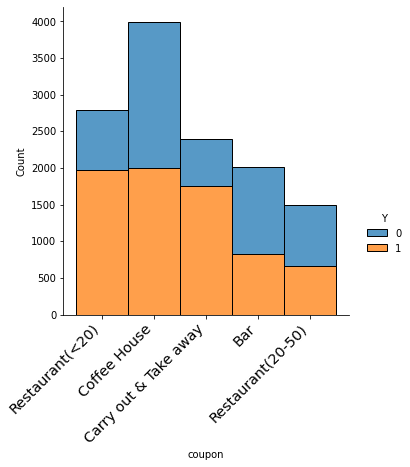

In [ ]:
#checking which coupons are most accepted
plt.figure(figsize=(8,4))
sns.displot(df, x='coupon', hue='Y', multiple='stack')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

([0, 1], <a list of 2 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

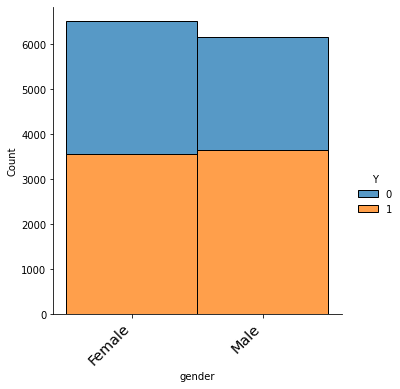

In [ ]:
#checking which gender accepts coupons the most
plt.figure(figsize=(8,4))
sns.displot(df, x='gender', hue='Y', multiple='stack')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

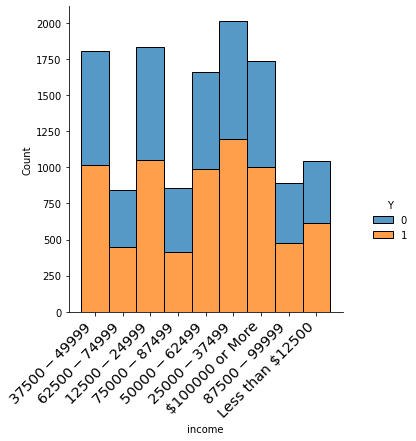

In [ ]:
#checking which income group accepts the coupon the most
plt.figure(figsize=(8,4))
sns.displot(df, x='income', hue='Y', multiple='stack')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

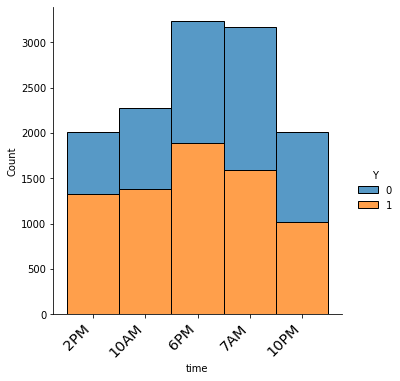

In [ ]:
#checking  coupons are most accepted at what time
plt.figure(figsize=(8,4))
sns.displot(df, x='time', hue='Y', multiple='stack')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

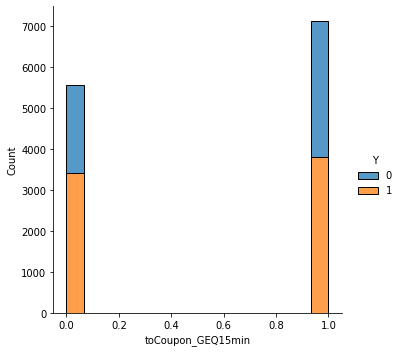

In [ ]:
#checking  coupons are most accepted at what time

sns.displot(df, x='toCoupon_GEQ15min', hue='Y', multiple='stack')


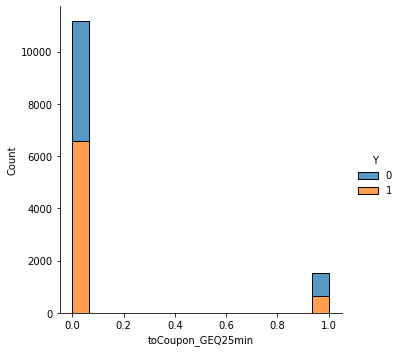

In [ ]:
sns.displot(df, x='toCoupon_GEQ25min', hue='Y', multiple='stack')

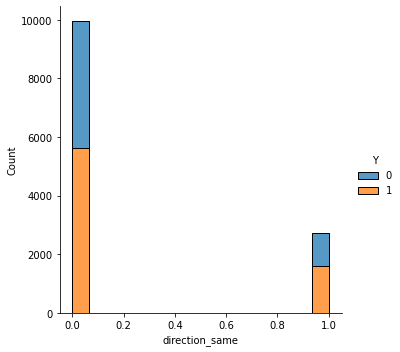

In [ ]:
##checking whether the direction of the rest/bar impacts the coupon acceptance
sns.displot(df, x='direction_same', hue='Y', multiple='stack')

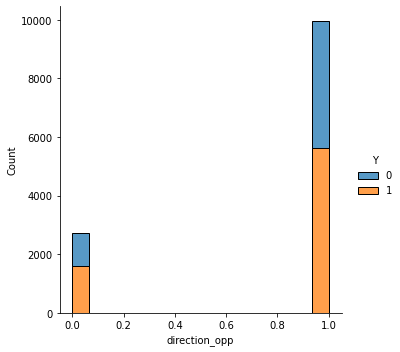

In [ ]:
sns.displot(df, x='direction_opp', hue='Y', multiple='stack')

In [27]:
df.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

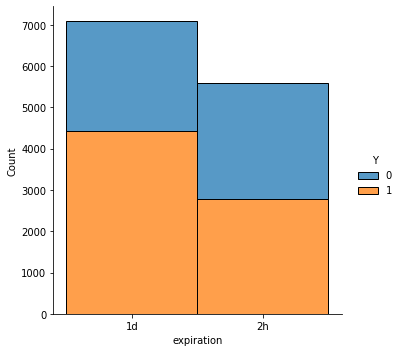

In [30]:
sns.displot(df, x='expiration', hue='Y', multiple='stack')

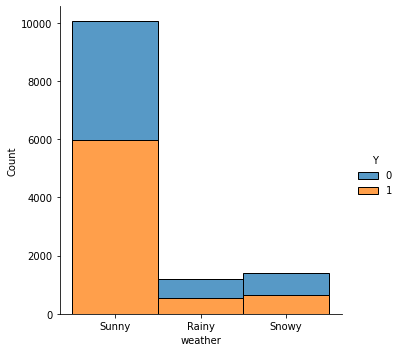

In [31]:
sns.displot(df, x='weather', hue='Y', multiple='stack')

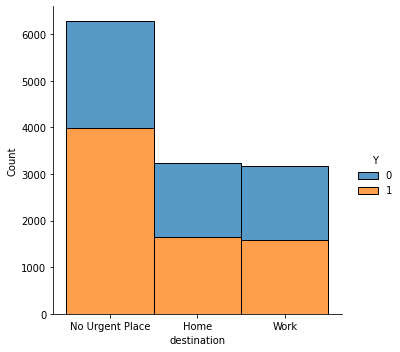

In [32]:
sns.displot(df, x='destination', hue='Y', multiple='stack')

In [41]:
#Remove NAs from the dataset
data = df.dropna(axis = 0, how ='any')

In [43]:
data.shape

(12079, 25)

In [46]:
##Ordinal encoding for categoricL Vvariables
from scikit.learn import LabelEncoder
cat_features=[x for x in data if data[x].dtype=="object"]

le=LabelEncoder()

for col in cat_features:
    if col in data.columns:
        i = data.columns.get_loc(col)
        data.iloc[:,i] = data.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [47]:
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,1,0,2,55,2,4,0,1,0,2,0,1,0,5,4,3,1,1,3,1,0,0,0,1,1
23,1,1,2,80,0,2,1,1,0,2,0,1,0,5,4,3,1,1,3,1,0,0,0,1,0
24,1,1,2,80,0,0,0,1,0,2,0,1,0,5,4,3,1,1,3,1,0,0,0,1,1
25,1,1,2,80,0,1,1,1,0,2,0,1,0,5,4,3,1,1,3,1,1,0,0,1,0
26,1,1,2,80,2,2,0,1,0,2,0,1,0,5,4,3,1,1,3,1,0,0,0,1,0


In [ ]:
train_data.columns

Index(['Pregnancy Test', 'Birth Control', 'Feminine Hygiene', 'Folic Acid',
       'Prenatal Vitamins', 'Prenatal Yoga', 'Body Pillow', 'Ginger Ale',
       'Sea Bands', 'Stopped buying ciggies', 'Cigarettes',
       'Smoking Cessation', 'Stopped buying wine', 'Wine', 'Maternity Clothes',
       'PREGNANT', 'Implied Gender_F', 'Implied Gender_M', 'Implied Gender_U',
       'Home/Apt/ PO Box_A', 'Home/Apt/ PO Box_H', 'Home/Apt/ PO Box_P'],
      dtype='object')

In [ ]:
#Create the train and test data
X_train = train_data.drop('PREGNANT',axis = 1)
y_train = train_data['PREGNANT']

In [ ]:
X_test = test_data.drop('PREGNANT',axis = 1)
y_test = test_data['PREGNANT']

In [ ]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = lr_model.predict(X_test)
print(accuracy_score(predictions, y_test))


0.88


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print(cm)

[[833 107]
 [ 13  47]]


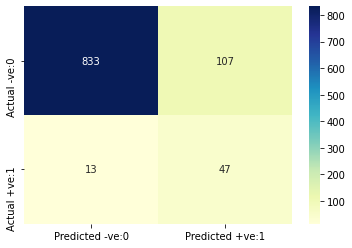

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'], 
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       940
           1       0.31      0.78      0.44        60

    accuracy                           0.88      1000
   macro avg       0.64      0.83      0.69      1000
weighted avg       0.94      0.88      0.90      1000



In [ ]:
 prediction_prob = lr_model.predict_proba(X_test)[:,1]

 prediction_prob[prediction_prob > 0.8] = 1
 prediction_prob[prediction_prob <= 0.8] = 0
 

In [ ]:
print(accuracy_score(y_test,prediction_prob))

0.949


In [ ]:
print(classification_report(y_test,prediction_prob))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       940
           1       0.57      0.62      0.59        60

    accuracy                           0.95      1000
   macro avg       0.77      0.79      0.78      1000
weighted avg       0.95      0.95      0.95      1000

